In [20]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import  ImageDataGenerator as Imgen

In [21]:
#Augmenting the training dataset
traingen = Imgen(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.15)
#Augmenting the testing dataset
testgen = Imgen(# rescale the images to 1./255 
                rescale = 1./255
                )

In [22]:
trainds = traingen.flow_from_directory("Training/",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("Training",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     subset="validation"
                                      )
testds = testgen.flow_from_directory("Testing",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)

Found 4447 images belonging to 4 classes.
Found 782 images belonging to 4 classes.
Found 0 images belonging to 0 classes.


In [23]:
c = trainds.class_indices
classes = list(c.keys())
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [24]:
x,y = next(trainds)                             
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 
    for i in range(16):                         
        plt.subplot(4,4,i+1)                       
        plt.imshow(x[i])                        
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()

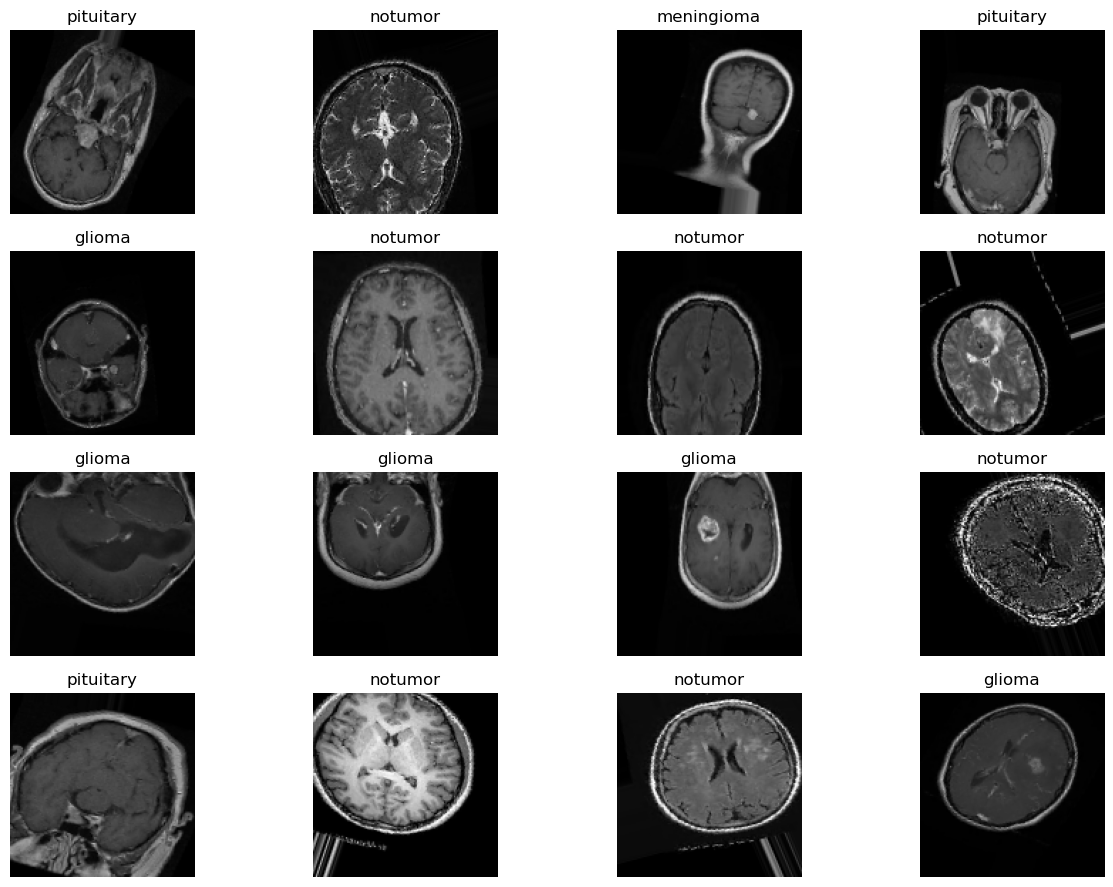

In [25]:
plotImages(x,y)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

In [27]:
cnn = Sequential([
    # first Layer
    Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    MaxPooling2D((2, 2)),
    # second layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

In [28]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 130, 130, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 65, 65, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 65, 65, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 32768)            

In [29]:
cnn.compile(loss="categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [30]:
history = cnn.fit(trainds,validation_data=valds,epochs=50, batch_size=16, verbose=1)

Epoch 1/50
278/278 [==============================] - 41s 144ms/step - loss: 1.0834 - accuracy: 0.4925 - val_loss: 1.2188 - val_accuracy: 0.5409
Epoch 2/50
278/278 [==============================] - 42s 150ms/step - loss: 0.8564 - accuracy: 0.6312 - val_loss: 1.0692 - val_accuracy: 0.6176
Epoch 3/50
278/278 [==============================] - 41s 146ms/step - loss: 0.7826 - accuracy: 0.6726 - val_loss: 1.1721 - val_accuracy: 0.5972
Epoch 4/50
278/278 [==============================] - 41s 148ms/step - loss: 0.7685 - accuracy: 0.6904 - val_loss: 1.0094 - val_accuracy: 0.6752
Epoch 5/50
278/278 [==============================] - 39s 140ms/step - loss: 0.7180 - accuracy: 0.7115 - val_loss: 0.9403 - val_accuracy: 0.7072
Epoch 6/50
278/278 [==============================] - 38s 138ms/step - loss: 0.7024 - accuracy: 0.7167 - val_loss: 1.0523 - val_accuracy: 0.6714
Epoch 7/50
278/278 [==============================] - 37s 132ms/step - loss: 0.6829 - accuracy: 0.7259 - val_loss: 0.8666 - val_ac

<Figure size 640x480 with 0 Axes>

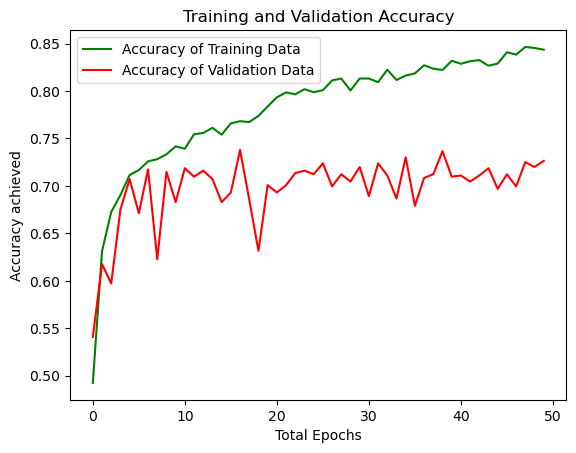

<Figure size 640x480 with 0 Axes>

In [31]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

C:\Users\MSI\AppData\Local\Temp\ipykernel_6484\3142671913.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


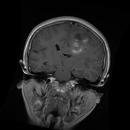

In [48]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
data = np.ndarray(shape=(1, 130, 130, 3), dtype=np.float32)
image = Image.open("Testing/0001.jpg")
size = (130, 130)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [49]:
prediction = cnn.predict(data)
print(prediction)
predict_index = np.argmax(prediction)
print(predict_index)

1/1 [==============================] - 0s 17ms/step
[[0. 0. 1. 0.]]
2


In [54]:
cnn.save('model.h5')

In [55]:
df=pd.read_csv("submission_attempt.csv")

In [56]:
df

,ID,Label
0,722,1
1,378,2
2,252,1
3,116,2
4,155,1
...,...,...
475,363,3
476,312,3
477,427,3
478,695,1


In [72]:
results_df

,ID,Label
0,0001.jpg,0
0,0002.jpg,2
0,0005.jpg,3
0,0006.jpg,1
0,0008.jpg,2
...,...,...
0,0992.jpg,3
0,0993.jpg,1
0,0996.jpg,0
0,0998.jpg,2


In [73]:
results_df['ID'] = results_df['ID'].str.replace('.jpg', '')

C:\Users\MSI\AppData\Local\Temp\ipykernel_6484\302816169.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  results_df['ID'] = results_df['ID'].str.replace('.jpg', '')


In [74]:
results_df

,ID,Label
0,0001,0
0,0002,2
0,0005,3
0,0006,1
0,0008,2
...,...,...
0,0992,3
0,0993,1
0,0996,0
0,0998,2


In [75]:
results_df.isnull().sum()

ID       0
Label    0
dtype: int64

In [79]:
results_df1=results_df.copy()

In [80]:
results_df1 = results_df1.reset_index(drop=True)

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image

# Path to the testing folder containing images to classify
test_path = 'Testing'

#Path to the trained model
model_path = 'model.h5'

# Load the model
model = load_model(model_path)

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['ID', 'Label'])

# Loop over each image in the testing folder
for img_file in os.listdir(test_path):
    try:
        # Load the image and convert it to a numpy array
        img = Image.open(os.path.join(test_path, img_file))
        img = img.resize((130, 130))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Normalize the image
        x /= 255.0

        # Make a prediction
        pred = model.predict(x)

        # Get the predicted label
        label = np.argmax(pred)

        # Add the results to the DataFrame
        results_df = pd.concat([results_df, pd.DataFrame({'ID': [img_file], 'Label': [label]})], ignore_index=True)

    except Exception as e:
        print(f"Error processing image {img_file}: {e}")
        results_df = pd.concat([results_df, pd.DataFrame({'ID': [img_file], 'Label': [0]})], ignore_index=True)


In [91]:
results_df

,ID,Label
0,0001.jpg,0
1,0002.jpg,2
2,0005.jpg,3
3,0006.jpg,1
4,0008.jpg,2
...,...,...
475,0992.jpg,3
476,0993.jpg,1
477,0996.jpg,0
478,0998.jpg,2


In [94]:
results_df.isnull().sum()

ID       0
Label    0
dtype: int64

In [95]:
results_df['ID'] = results_df['ID'].str.replace('.jpg', '')

C:\Users\MSI\AppData\Local\Temp\ipykernel_6484\302816169.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  results_df['ID'] = results_df['ID'].str.replace('.jpg', '')


In [96]:
results_df

,ID,Label
0,0001,0
1,0002,2
2,0005,3
3,0006,1
4,0008,2
...,...,...
475,0992,3
476,0993,1
477,0996,0
478,0998,2


In [97]:
results_df['ID'].dtype

dtype('O')

In [98]:
results_df.to_csv('results.csv', index=False)